In [118]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [120]:
fingertype = {
    'real': '01',
    'altered': '02',
}

In [122]:
dataset="C://Users//tatba//OneDrive//Desktop//Dataset//Fingerprintscan"

In [75]:
# Image parameters
img_height, img_width = 128, 128

In [76]:
# Load images and labels from filenames
def load_data(path):
    images = []
    labels = []
    for filename in os.listdir(path):
        if filename.endswith('.BMP'):
            # Load image manually using cv2
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, (img_width, img_height))
            img_array = img / 255.0  # Normalize
            images.append(img_array)
            # Extract emotion from filename (3rd element in the filename)
            finger_code = filename.split('-')[0]
            finger_label = fingertype[finger_code]
            labels.append(finger_code)
    return np.array(images), np.array(labels)

In [77]:
# Load the dataset
X, y = load_data(dataset)

In [78]:
# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [79]:
# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [80]:
# Convert labels to categorical (one-hot encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes=2)

In [81]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation='sigmoid')
])

C:\Users\tatba\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,782,658 (10.61 MB)

 Trainable params: 2,781,890 (10.61 MB)

 Non-trainable params: 768 (3.00 KB)

In [83]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [84]:
history = model.fit(
    X_train,
    y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=16
)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.5775 - loss: 0.9072 - val_accuracy: 0.4357 - val_loss: 2.0658
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7444 - loss: 0.6254 - val_accuracy: 0.4286 - val_loss: 2.2528
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.7663 - loss: 0.5446 - val_accuracy: 0.6143 - val_loss: 0.8269
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7824 - loss: 0.5094 - val_accuracy: 0.6571 - val_loss: 0.7926
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.8035 - loss: 0.4908 - val_accuracy: 0.6286 - val_loss: 1.3953
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.8352 - loss: 0.4292 - val_accuracy: 0.7286 - val_loss: 1.1147
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.8151 - loss: 0.4644 - val_accuracy: 0.5786 - val_loss: 0.9955
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.8046 - loss: 0.4498 - val_accuracy: 0.

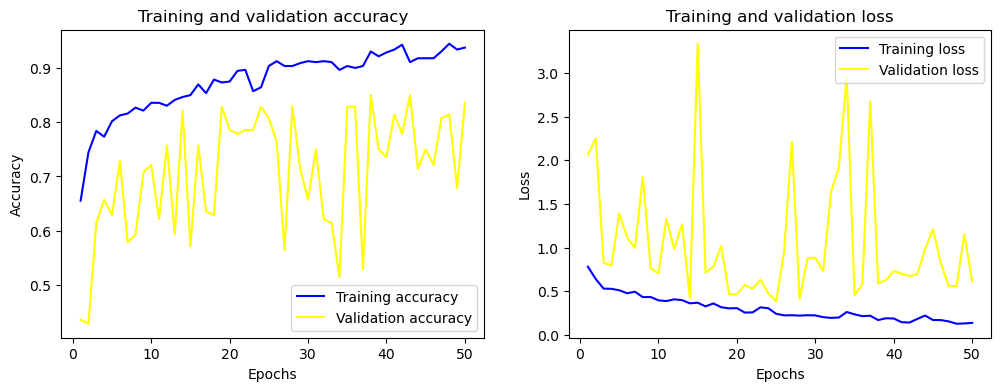

In [85]:
# Plot training & validation accuracy/loss
def plot_accuracy_loss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc,color='blue', label='Training accuracy')
    plt.plot(epochs, val_acc,color='yellow', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss,color='blue', label='Training loss')
    plt.plot(epochs, val_loss,color='yellow', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_accuracy_loss(history)

In [86]:
# Get predictions
Y_pred = model.predict(X_val)
y_pred = np.argmax(Y_pred, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Classification Report
              precision    recall  f1-score   support

        real       0.94      0.76      0.84        79
     altered       0.75      0.93      0.83        61

    accuracy                           0.84       140
   macro avg       0.84      0.85      0.84       140
weighted avg       0.86      0.84      0.84       140

Confusion Matrix
[[60 19]
 [ 4 57]]


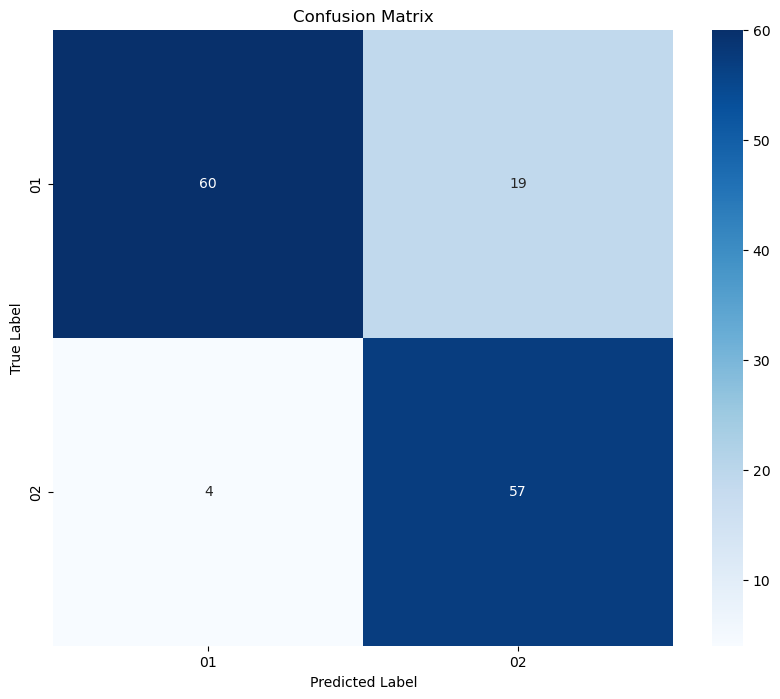

In [87]:
# Confusion matrix and classification report
clr = classification_report(y_val, y_pred, target_names=fingertype)
print("Classification Report")
print(clr)

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)
labels = list(fingertype.values())
print("Confusion Matrix")
print(cm) 
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

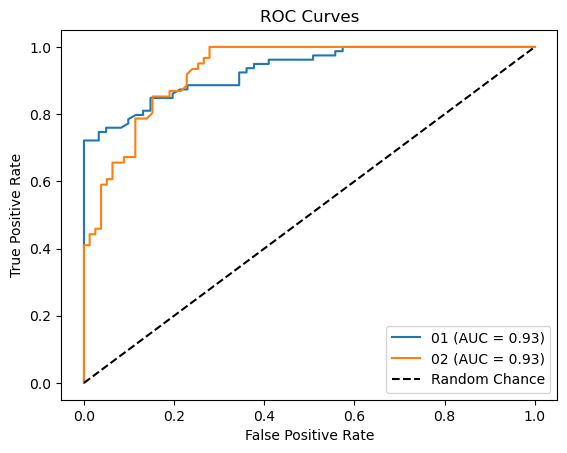

In [88]:
# Binarize labels for ROC-AUC
n_classes = len(labels)
y_val_bin = tf.keras.utils.to_categorical(y_val, num_classes=n_classes)
y_pred_bin = tf.keras.utils.to_categorical(y_pred, num_classes=n_classes)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()